In [30]:
## Importing required package
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
## load the dataset
df = pd.read_excel('train.xlsx')

## checking the first five row dataset
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [3]:
## checking the shape of the dataset
print(f"Shape of dataset: {df.shape}")
print(f'Total row: {df.shape[0]} and Total Column: {df.shape[1]}')

Shape of dataset: (36752, 19)
Total row: 36752 and Total Column: 19


In [4]:
## checking the data types of the dataset
df.dtypes

T1         int64
T2         int64
T3         int64
T4         int64
T5         int64
T6         int64
T7         int64
T8         int64
T9         int64
T10        int64
T11        int64
T12        int64
T13        int64
T14        int64
T15        int64
T16        int64
T17        int64
T18        int64
target    object
dtype: object

 All column except target column is of integer data type

In [5]:
## checking the null value in the dataset
df.isnull().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

No null value is in the dataset

In [6]:
## dataset description
df.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


## Preprocessing of the data

In [7]:
## droping the target column because it is not required in clustering
df = df.drop('target', axis =1)

In [8]:
## Scaling the data
scaler = StandardScaler()
df_scaled =scaler.fit_transform(df)

## Model Training

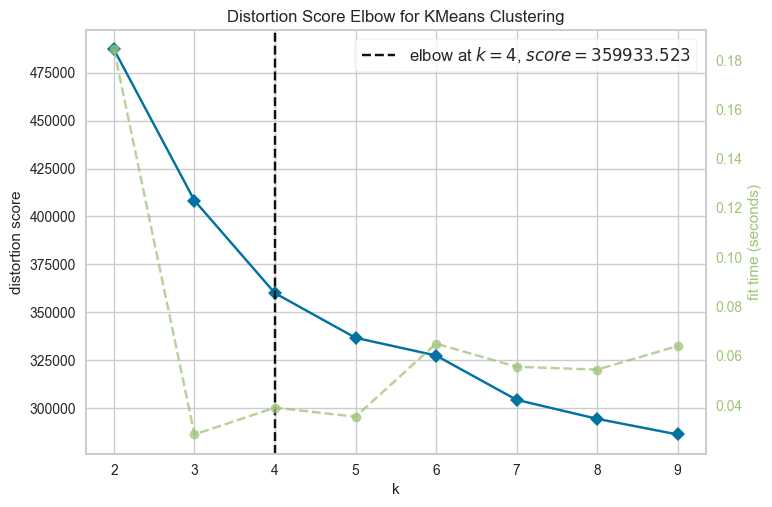

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
## for getting the best value of k i.e no of cluster
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(init="k-means++",random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df_scaled)        
visualizer.show()  

In [10]:
## Another way of checking th best value of k i.e no of cluster
from kneed import KneeLocator
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
kl =KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

4

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42,init="k-means++")

In [12]:
## Predicting the cluster
kmeans.fit_predict(df_scaled)

array([0, 1, 0, ..., 2, 2, 3])

In [13]:
kmeans.labels_

array([0, 1, 0, ..., 2, 2, 3])

In [14]:
y_label =kmeans.labels_

In [15]:
df['Cluster'] = y_label

In [16]:
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,Cluster
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,1
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,0
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,2
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,0


## creating the model file

In [17]:
## Saving the model file
import pickle as pkl

with open('scaler.pkl','wb') as f:
    pkl.dump(scaler, f)

with open('kmeans_model.pkl', 'wb')as f:
    pkl.dump(kmeans, f)

## Prediction of the cluster for new data

In [18]:
## loading the model file

with open('scaler.pkl','rb') as f:
    scaler_model = pkl.load(f)

with open('kmeans_model.pkl', 'rb') as f:
    kmean_model = pkl.load(f)

In [19]:
## function for prediction of the cluster of new data
def prediction(new_data, kmeans_model, scaler_model):
    new_data = scaler_model.transform(new_data)
    prediction = kmeans_model.predict(new_data)
    explanations = []
    for idx, data_point in enumerate(new_data):
        cluster_idx = prediction[idx]
        centroid = kmeans_model.cluster_centers_[cluster_idx]
        distance = np.linalg.norm(data_point - centroid)
        explanation = f"The data point belongs to cluster {cluster_idx} because it is closest to the centroid with a distance of {distance:.2f}."
        explanations.append((prediction[idx], explanation))
    
    return prediction, explanations

In [31]:
## loading the new data

new_data = [50,10,14,78,96,54,12,36,45,36,47,52,63,47,45,63,17,25]
data_point = np.array(new_data).reshape(1, -1)
prediction(data_point, kmean_model, scaler_model)

(array([3]),
 [(3,
   'The data point belongs to cluster 3 because it is closest to the centroid with a distance of 50.74.')])